In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# sklearn.calibration.calibration_curve
from sklearn.calibration import calibration_curve

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

## 1 ##

In [3]:
data_url = (
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data"
)
df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<IPython.core.display.Javascript object>

In [6]:
df1 = df.drop(columns=["name"])
X = df1.drop(columns=["status"])
y = df1["status"]  # should this be a dataframe or an array?

<IPython.core.display.Javascript object>

## 3 ##

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

## 4,5 ##

In [8]:
model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=10000)
model.fit(X_train, y_train)  # What does it mean to converge?
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8589743589743589
0.8974358974358975


<IPython.core.display.Javascript object>

## 6

In [9]:
model2 = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=10000)
model2.fit(X_train, y_train)  # What does it mean to converge?
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.8525641025641025
0.8974358974358975


<IPython.core.display.Javascript object>

No difference

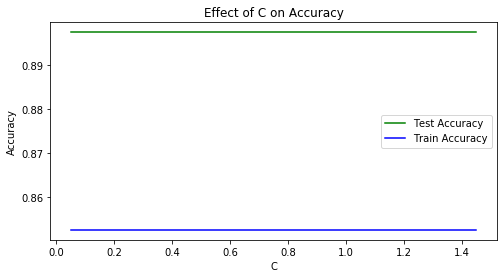

<IPython.core.display.Javascript object>

In [10]:
c = 0.05
test_acc = []
train_acc = []
c_vals = []

while c <= 1.5:
    model3 = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=10000)
    model3.fit(X_train, y_train)
    test_acc.append(model3.score(X_test, y_test))
    train_acc.append(model3.score(X_train, y_train))
    c_vals.append(c)
    c = c + 0.05

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_acc, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_acc, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

Hmm, is this right? Guess so